This is the project from Tempus company. The dataset consists 16526 features and 1 response variable. There are 530 observations. So the number of features(predictors) is much larger than sample size. The goal is to create a predictive model for response variable. Basically, this project consists three parts, which are explonatory data analysis, dimension reduction, machine learning modeling.

In the explorary data analysis, I check data type, data summary, dimensionality of the data. I can see response variable is binary data. So, logistic regression may be a choice for predictive modeling. I draw countplot of binary data and calculate the percentage of 1's for response variable. 

Since the dataset has too many features, I need to reduce data dimensionality before applying machine learning models.

In the dimensional reduction part, I apply the PCA to reduce dimensionality of data. Then I apply logistic regression model for prediction. The precision is 0.87. To increase the precision, I also try some other ways to process data before applying PCA. I calculate correlations of each feature variable with response variable, then I remove some low correlated features. For the selected features , I apply PCA to reduce dimension further. Finally, I use logistic regression, support vector machine, random forest, stochastic gradient descent (SGD) learning, and XG-boosting method to make prediction model. And the highest precision is 92%.


Firstly, I import some useful libaries for data process, data visualization and machine learning models.

In [111]:
#import some library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import machine learning library
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier

Read raw data

In [2]:
df = pd.read_csv('DScasestudy_1.txt', delimiter = "\t")

In [3]:
##look at the data
df.head()

,response,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16553,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df.shape

(530, 16563)

In [4]:
##data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Columns: 16563 entries, response to V16562
dtypes: int64(16563)
memory usage: 67.0 MB


Data has more feature variables than observations (n<<p)
By summarizing the data, I can see there are 530 observations and some statistics of all variables.

In [5]:
df.describe()

,response,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16553,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562
count,530.000000,530.000000,530.000000,530.000000,530.0,530.000000,530.0,530.000000,530.000000,530.0,...,530.000000,530.0,530.0,530.000000,530.000000,530.000000,530.0,530.000000,530.0,530.000000
mean,0.232075,0.009434,0.009434,0.001887,0.0,0.020755,1.0,0.001887,0.030189,0.0,...,0.158491,0.0,0.0,0.001887,0.020755,0.013208,0.0,0.003774,0.0,0.447170
std,0.422556,0.096761,0.096761,0.043437,0.0,0.142697,0.0,0.043437,0.171268,0.0,...,0.365545,0.0,0.0,0.043437,0.142697,0.114270,0.0,0.061371,0.0,0.497671
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.0,1.000000,1.000000,0.0,...,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000


Then I check missing or null values in dataset,there is no missing values.

In [6]:
#chech missing values
df.isnull().sum().sum()
#there is no missing values

0

In [ ]:
By countplot of response variable, I can see there are 407 0's and 123 1's in the response data.

0    407
1    123
Name: response, dtype: int64

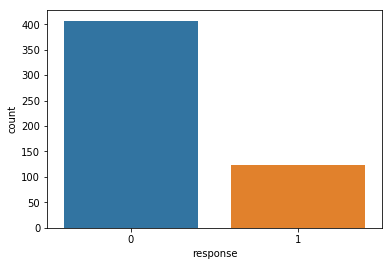

In [7]:
##Data visualization
sns.countplot(df['response'],data=df)
df['response'].value_counts()
df['response'].value_counts()

I calculate the percentage of 1's in reponse variable, there are 23.2% of 1's. Since data is not balanced, in scikit learn, I use class_weight='balanced ' to blance data before modeling.

In [8]:
#percentage of 1 in response
print((df['response'].sum()/df['response'].count())*100)
##23% of reponse are 1

23.20754716981132


To make PCA more efficiently for reducing dimensionality, I remove the features or columns with same entries. After doing this, there are 10894 entries in dataset.

In [9]:
##drop some columns with same entries
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df.drop(cols_to_drop, inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Columns: 10894 entries, response to V16562
dtypes: int64(10894)
memory usage: 44.1 MB


In feature selection process, I calculate correlation and absolute value of correlation between each variable and response variable. I sort the absolute value of correlations and  make statistical summary of the correlations. We can see that most absoluate correlation are smaller than 0.08. I use it as threshold to filter out some lower correlated variables with response. Then I apply PCA and machine learning models on selected variables. 

In [11]:
#calculate correlation matrix
correlations=df.corr(method='pearson')
#cal correlation between features and response
cor=correlations['response']

In [87]:
#make dataframe of correlations
corr1=pd.DataFrame({'features':cor.index, 'corr':cor.values})
#add another col as abs of correlations
corr1['abscorr']=corr1['corr'].abs()
#rank abs correlations
corr1.sort_values(by='abscorr',ascending=False)
corr1.describe()

,corr,abscorr
count,10894.000000,10894.000000
mean,0.008214,0.049189
std,0.064720,0.042853
min,-0.175642,0.000083
25%,-0.033834,0.023902
50%,-0.007415,0.038819
75%,0.041912,0.067886
max,1.000000,1.000000


I select the feature variables with absolute value of correlations greater than 0.08. By doing this, there are only 1679 remaining features. Then I apply PCA on these selected features.

In [88]:
f_select=corr1[corr1['abscorr']>0.08]['features']
f_select=list(f_select)
df_s=df[list(f_select)]
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Columns: 1679 entries, response to V16553
dtypes: int64(1679)
memory usage: 6.8 MB


Define X data frame by dropping response variable and define y as response variable.

In [90]:
X=df_s.drop('response',axis=1)
y=df_s['response']
X.head()

,V17,V24,V25,V27,V39,V46,V53,V71,V76,V104,...,V16460,V16485,V16497,V16502,V16509,V16532,V16535,V16542,V16545,V16553
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0


Split data into training set and test set by setting test size as 20%

In [91]:
#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

I standarlize the data and use PCA to reduce data dimensions. I choose the principal components covering 97% of variations, there are 348 principal components. By PCA, data dimension is reduced from 1679 to 348.

In [92]:
#Standarlize data
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
##apply PCA to reduce data dimension 
pca=PCA(0.97)
pca.fit(X_train)
print(pca.n_components_)
##number of components
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)


348


Fitting logistic regression model with solver 'lbfgs', the precision is 0.92. 

In [95]:
#logistic regression model
logReg=LogisticRegression(solver = 'lbfgs', class_weight = 'balanced')
#logReg=LogisticRegression()
logReg.fit(X_train,y_train)
predictions=logReg.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.98      0.95        83
          1       0.89      0.74      0.81        23

avg / total       0.92      0.92      0.92       106



With the similar way, I use support vector machine model, the precision is 0.88, which is smaller than logistic regression model.

In [98]:

f_select=corr1[corr1['abscorr']>0.1]['features']
f_select=list(f_select)
df_s=df[list(f_select)]
df_s.info()

X=df_s.drop('response',axis=1)
y=df_s['response']
#X.head()

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


#SVM Classifier
#param_grid = {'C': [1,10,20,30,40,50,60]} 
params_grid = {"C": [10**k for k in range(-3, 4)]}
svc=LinearSVC(dual=False, random_state=42, class_weight='balanced')
grid = GridSearchCV(svc,param_grid)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))
#print('Accuracy on test set with raw data:{:.3f}'.format(grid.score(X_test,y_test)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Columns: 1106 entries, response to V16553
dtypes: int64(1106)
memory usage: 4.5 MB
             precision    recall  f1-score   support

          0       0.90      0.96      0.93       123
          1       0.82      0.64      0.72        36

avg / total       0.88      0.89      0.88       159



I also use random forest classifier, the precision is 0.88, which is same as support vector machine model.

In [75]:
#random forest classifier
rfc = RandomForestClassifier(n_estimators=200,max_depth=3,random_state=0)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.86      0.99      0.92       123
          1       0.94      0.44      0.60        36

avg / total       0.88      0.87      0.85       159



Finally, I tried xgboost classifier, the precision is 0.90, which is better than random forest and SVM, but smaller than logistic regression.

In [77]:
from xgboost import XGBClassifier
model=XGBClassifier(max_depth=3, n_estimators=200, learning_rate=0.05)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94       123
          1       0.92      0.61      0.73        36

avg / total       0.90      0.90      0.89       159



/Users/student/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Similarly, I try SGD classifier, the precision is 0.87. 

In [105]:
clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.86      0.98      0.92       123
          1       0.89      0.44      0.59        36

avg / total       0.87      0.86      0.84       159



Additionally, I try to use PCA without removing the lower correlated variables to response. Then, I use logistic regression to make prediction, the precision is 0.87, which is lower to the logitic regression model after removing lower correlated variables and PCA.

In [103]:
X1=df.drop('response',axis=1)
y1=df['response']
X1.head()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

#Standarlize data
scaler=StandardScaler()
scaler.fit(X1_train)
X1_train=scaler.transform(X1_train)
X1_test=scaler.transform(X1_test)
##apply PCA to reduce data dimension 
pca=PCA(0.97)
pca.fit(X1_train)
print(pca.n_components_)
##number of components
X1_train=pca.transform(X1_train)
X1_test=pca.transform(X1_test)
#logistic regression model
logReg=LogisticRegression(solver = 'lbfgs', class_weight = 'balanced')
#logReg=LogisticRegression()
logReg.fit(X1_train,y1_train)
predictions=logReg.predict(X1_test)
print(classification_report(y1_test,predictions))

316
             precision    recall  f1-score   support

          0       0.82      1.00      0.90       116
          1       1.00      0.40      0.57        43

avg / total       0.87      0.84      0.81       159



Conclusion: In this project, I achieve the goal of creating a predictive model for response variable. Basically, I do the explonatory data analysis, dimension reduction, machine learning modeling. Firstly, I remove some features which have lower correlations with response. Then for selected variables, I use PCA to reduce data dimensionality. Finally, I use different machine learning classifier to make prediction on test set. By comparing different performance of different classifer, logistic regression after removing lower correlated variables and PCA has highest precision, which is 92%.